<a href="https://colab.research.google.com/github/strlla4536/Deeplearning-Python/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sklearn 전처리
* 전처리 : 데이터 분석에 적합하게 데이터를 가공/변형/처리/클리닝 하는 것.

#Boston 집값
aa*w=bb 의 w 구해야함
* aa라는 집값의 샘플과 요인들의 관계 알아보는게 목적
* Least square : Min{(ax-b)^2}
* 변수 : 요인들이 가지고 있는 가중치(영향력)
* A^tA x = A^t b

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


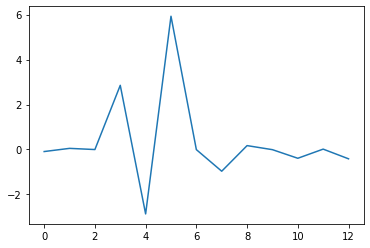

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

boston = datasets.load_boston()
print(boston.keys())
print(boston.feature_names) #집값을 결정하는 특징들

aa= boston.data    #dict_keys[0] = data = aa
bb= boston.target    #현재 집값의 싯가
# print(type(aa))  ==> class 'numpy.ndarray'
#print(aa.shape)   #506*13 행렬. 506개의 집값과 13개의 features

nr,nc = aa.shape    #nr=row(행)=506, nc=column=13
an = np.zeros((nc,nc)) #aa^taa에 해당
bn = np.zeros(nc)      #aa^tbb에 해당

for loop로 xx 구하기

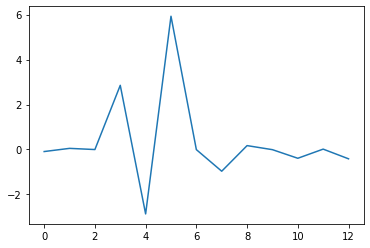

In [ ]:
for ic1 in range(nc):
  for ic2 in range(nc):
    tmp=0
    for ir in range(nr):
      tmp=tmp+aa[ir,ic1]*aa[ir,ic2]     #506*506
    an[ic1,ic2]=tmp

for ic1 in range(nc):
  tmp=0
  for ir in range(nr):
    tmp=tmp+aa[ir,ic1]*bb[ir]
  bn[ic1]=tmp  

# X= an^(-1) * bn
xx = np.linalg.solve(an,bn)

plt.figure()
plt.plot(xx)
plt.show()

np.transpose, np.matmul 로 구하기

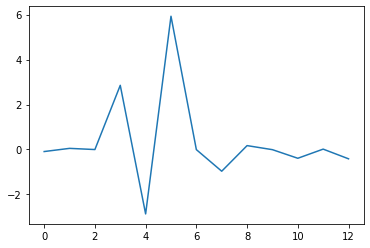

In [ ]:
at=np.transpose(aa)
#print(at.shape)   #출력하면 ; (13, 506)
an2=np.matmul(at,aa)  #matrix multiply ; at*aa
bn2=np.matmul(at,bb)  #at*bb

yy=np.linalg.solve(an2,bn2)
plt.figure()
plt.plot(yy)
plt.show()

Ax-b=0

transpose(전치)나 normal matrix 하지 않아도 
***np.linalg.lstsq()*** 쓰면 해 결정

non-negative solution 구하는 경우가 많아서 제한 걸어야 함 ==> ***from scipy.optimize import nnls***

np.linalg.lstsq로 구하기  - 제한걸어야함

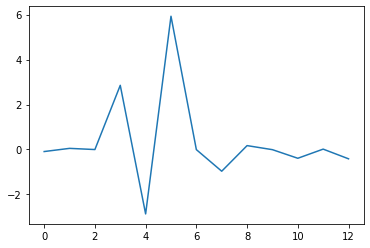

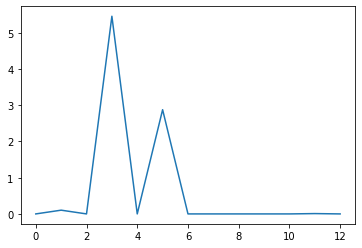

In [ ]:
zz=np.linalg.lstsq(aa,bb,rcond=None)
plt.figure()
plt.plot(zz[0])
plt.show()

from scipy.optimize import nnls
zz2=nnls(aa,bb)
#제한조건이 걸려있는 상태에서 최적화 구하기

plt.figure()
plt.plot(zz2[0])
plt.show()
#가중치가 달라졌음..
#조건 걸어서 최적화 구할 수 있음을 유의

Price= 22.470510657084095


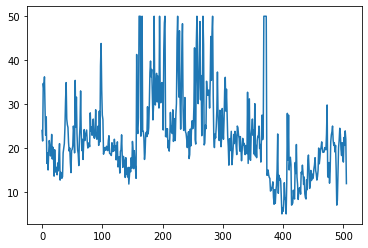

In [ ]:
ta=np.sum(aa,axis=0)/nr   #sum(aa,axis=0):column,row들을 다 합해라  
#평균구하기
prdt_pr=np.dot(ta,yy)  #prdt_prc:predict price ; 원래 있는 함수X, 교수님 맘대로 정한거
#dot : 내적 (ta내적yy)
print('Price=',prdt_pr)

plt.figure()
plt.plot(bb)
plt.show()